(plots_arguments_guide)=
# Plots' arguments guide

Arviz {ref}`plot <plot_api>` module is used for plotting data.
It consists many functions that each serve different purposes.
Most of these plotting functions have common arguments.
These common arguments are explained in the following examples,
which use one specific function to illustrate the usage but
the behaviour described here will be the same for the
other functions with the same argument.

This page can be downloaded as a {jupyter-download:script}`Python script <plots_arguments_guide>`
or as a {jupyter-download:nb}`Jupyter notebook <plots_arguments_guide>`.

In [1]:
import arviz as az
import numpy as np

centered_eight = az.load_arviz_data('centered_eight')
non_centered_eight = az.load_arviz_data('non_centered_eight')

x_data = np.random.normal(0, 1, 100)
y_data = np.random.normal(2 + x_data * 0.5, 0.5, (2, 50, 100))

In [2]:
az.style.use("arviz-darkgrid")

In [3]:
# if running the notebook locally,
# you can set the backend here to compare
# the backends available with ArviZ
az.rcParams["plot.backend"] = "matplotlib"
# Uncomment if using bokeh
# az.output_notebook()

:::{warning} Page in construction
:::

(common_var_names)=
## `var_names`

Variables to be plotted. If None all variables are plotted.
Prefix the variables by `~` when you want to exclude them from the plot.
Let's see the examples.

Plot all variables, which is the default behavior:

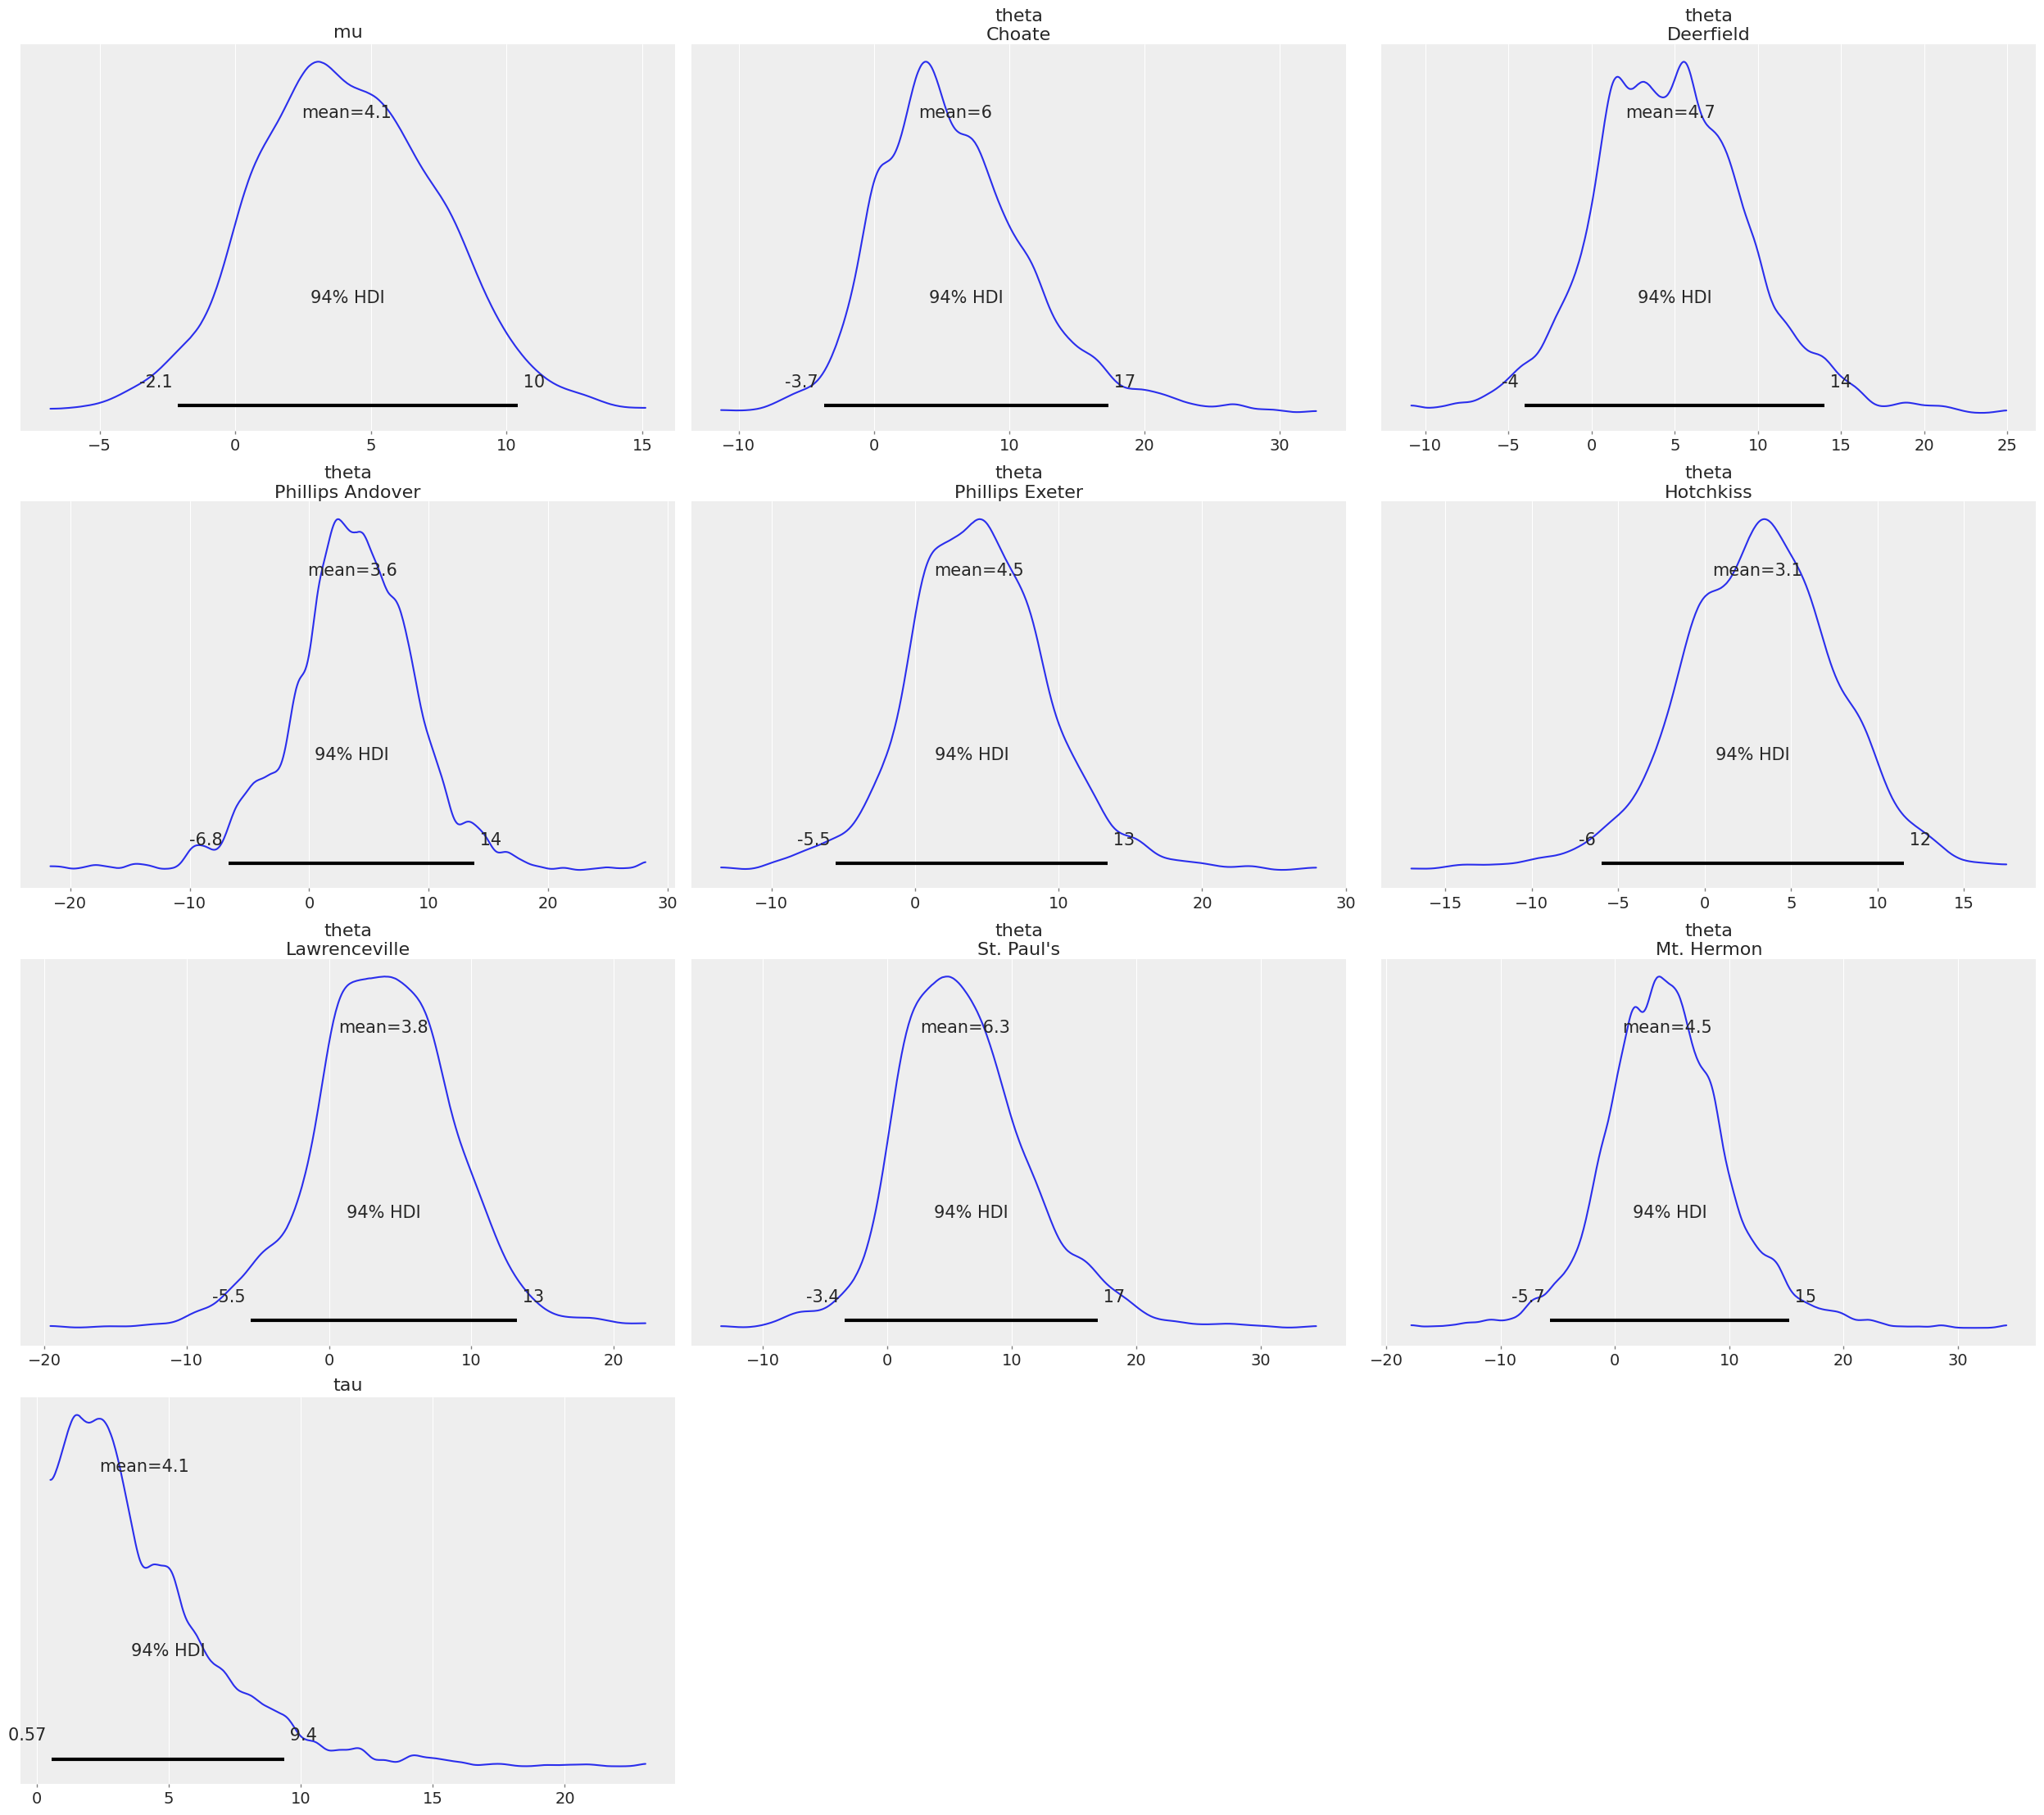

In [4]:
az.plot_posterior(centered_eight);

Plot one variable by setting `var_names="var1"`:

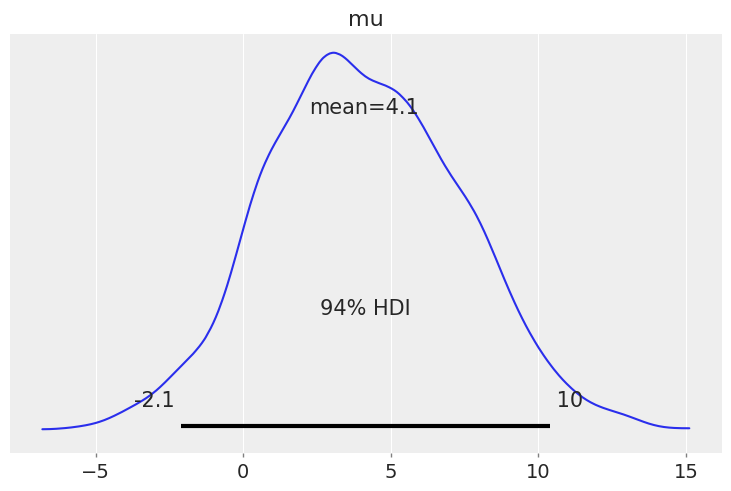

In [5]:
az.plot_posterior(centered_eight, var_names='mu');

Plot subset variables by specifying variable name exactly:

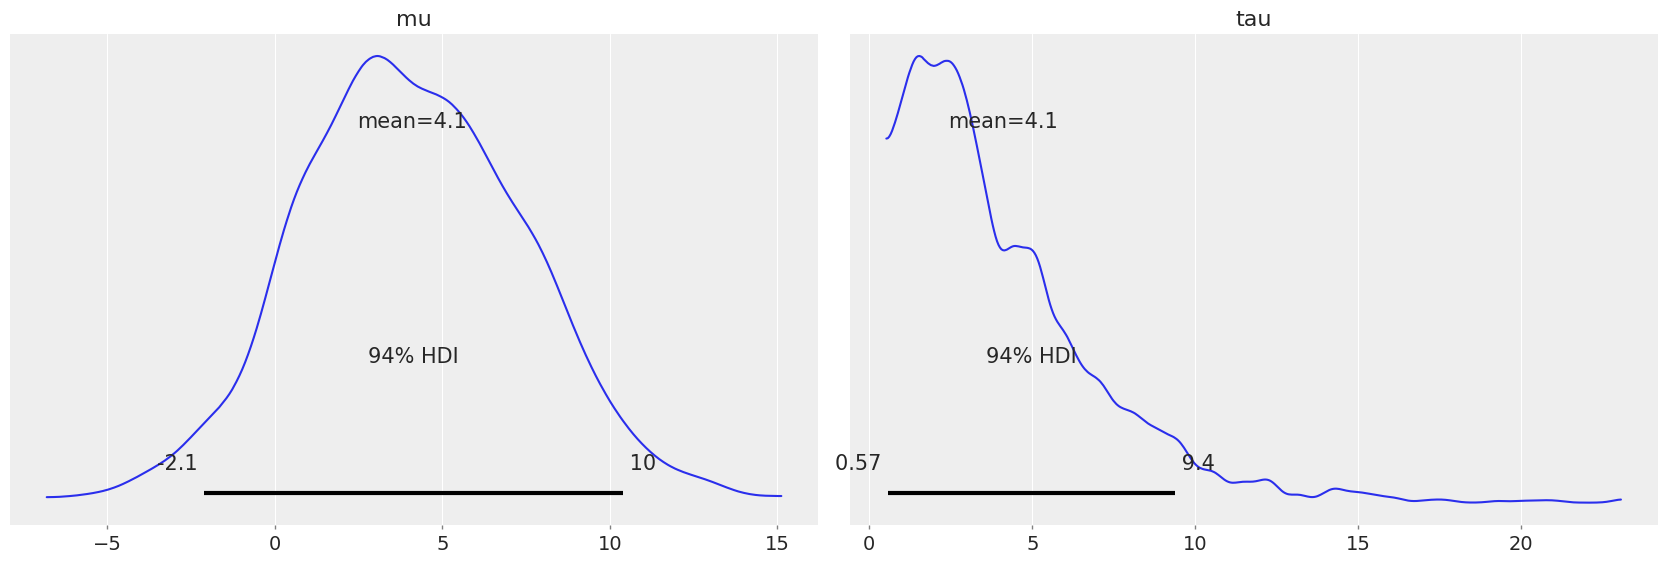

In [6]:
az.plot_posterior(centered_eight, var_names=['mu', 'tau']);

Use `var_names` to indicate which variables to exclude with the `~` prefix:

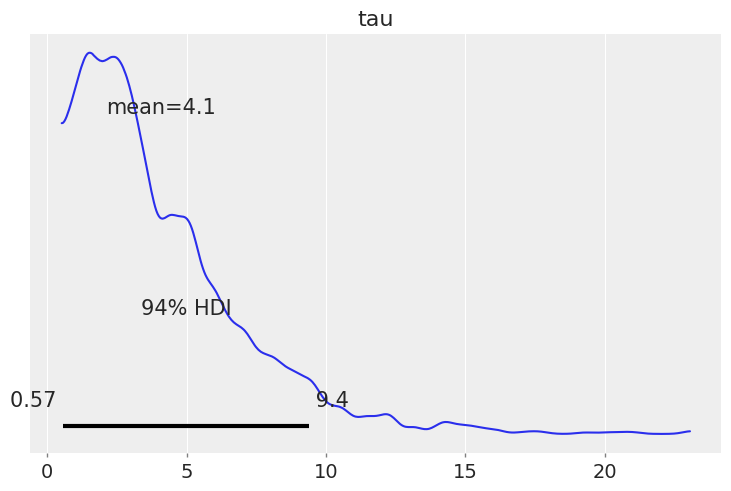

In [7]:
az.plot_posterior(centered_eight, var_names=['~mu', '~theta']);

Variables do not need to be strings to be used. Anything that is
hashable will work.

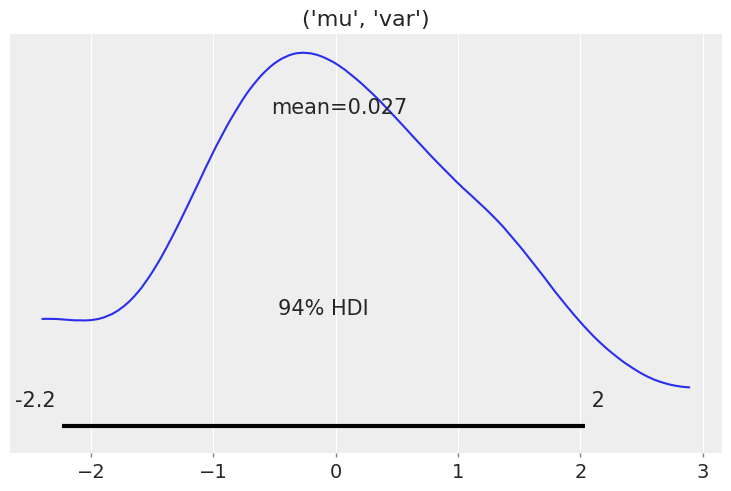

In [8]:
mu = ("mu", "var")
samples = np.random.normal(0, 1, 100)
data = az.dict_to_dataset({mu: samples})
az.plot_posterior(data);

(common_filter_vars)=
## `filter_vars`
If None (default), interpret `var_names` as the real variables names,
as shown in {ref}`the previous section <common_var_names>`.
This argument is inspired in {meth}`pandas.DataFrame.filter`.

If `“like”`, interpret `var_names` as substrings of the real variables names.
Each substring is checked against all present variable names and the
list of matching variables to be plotted is generated.

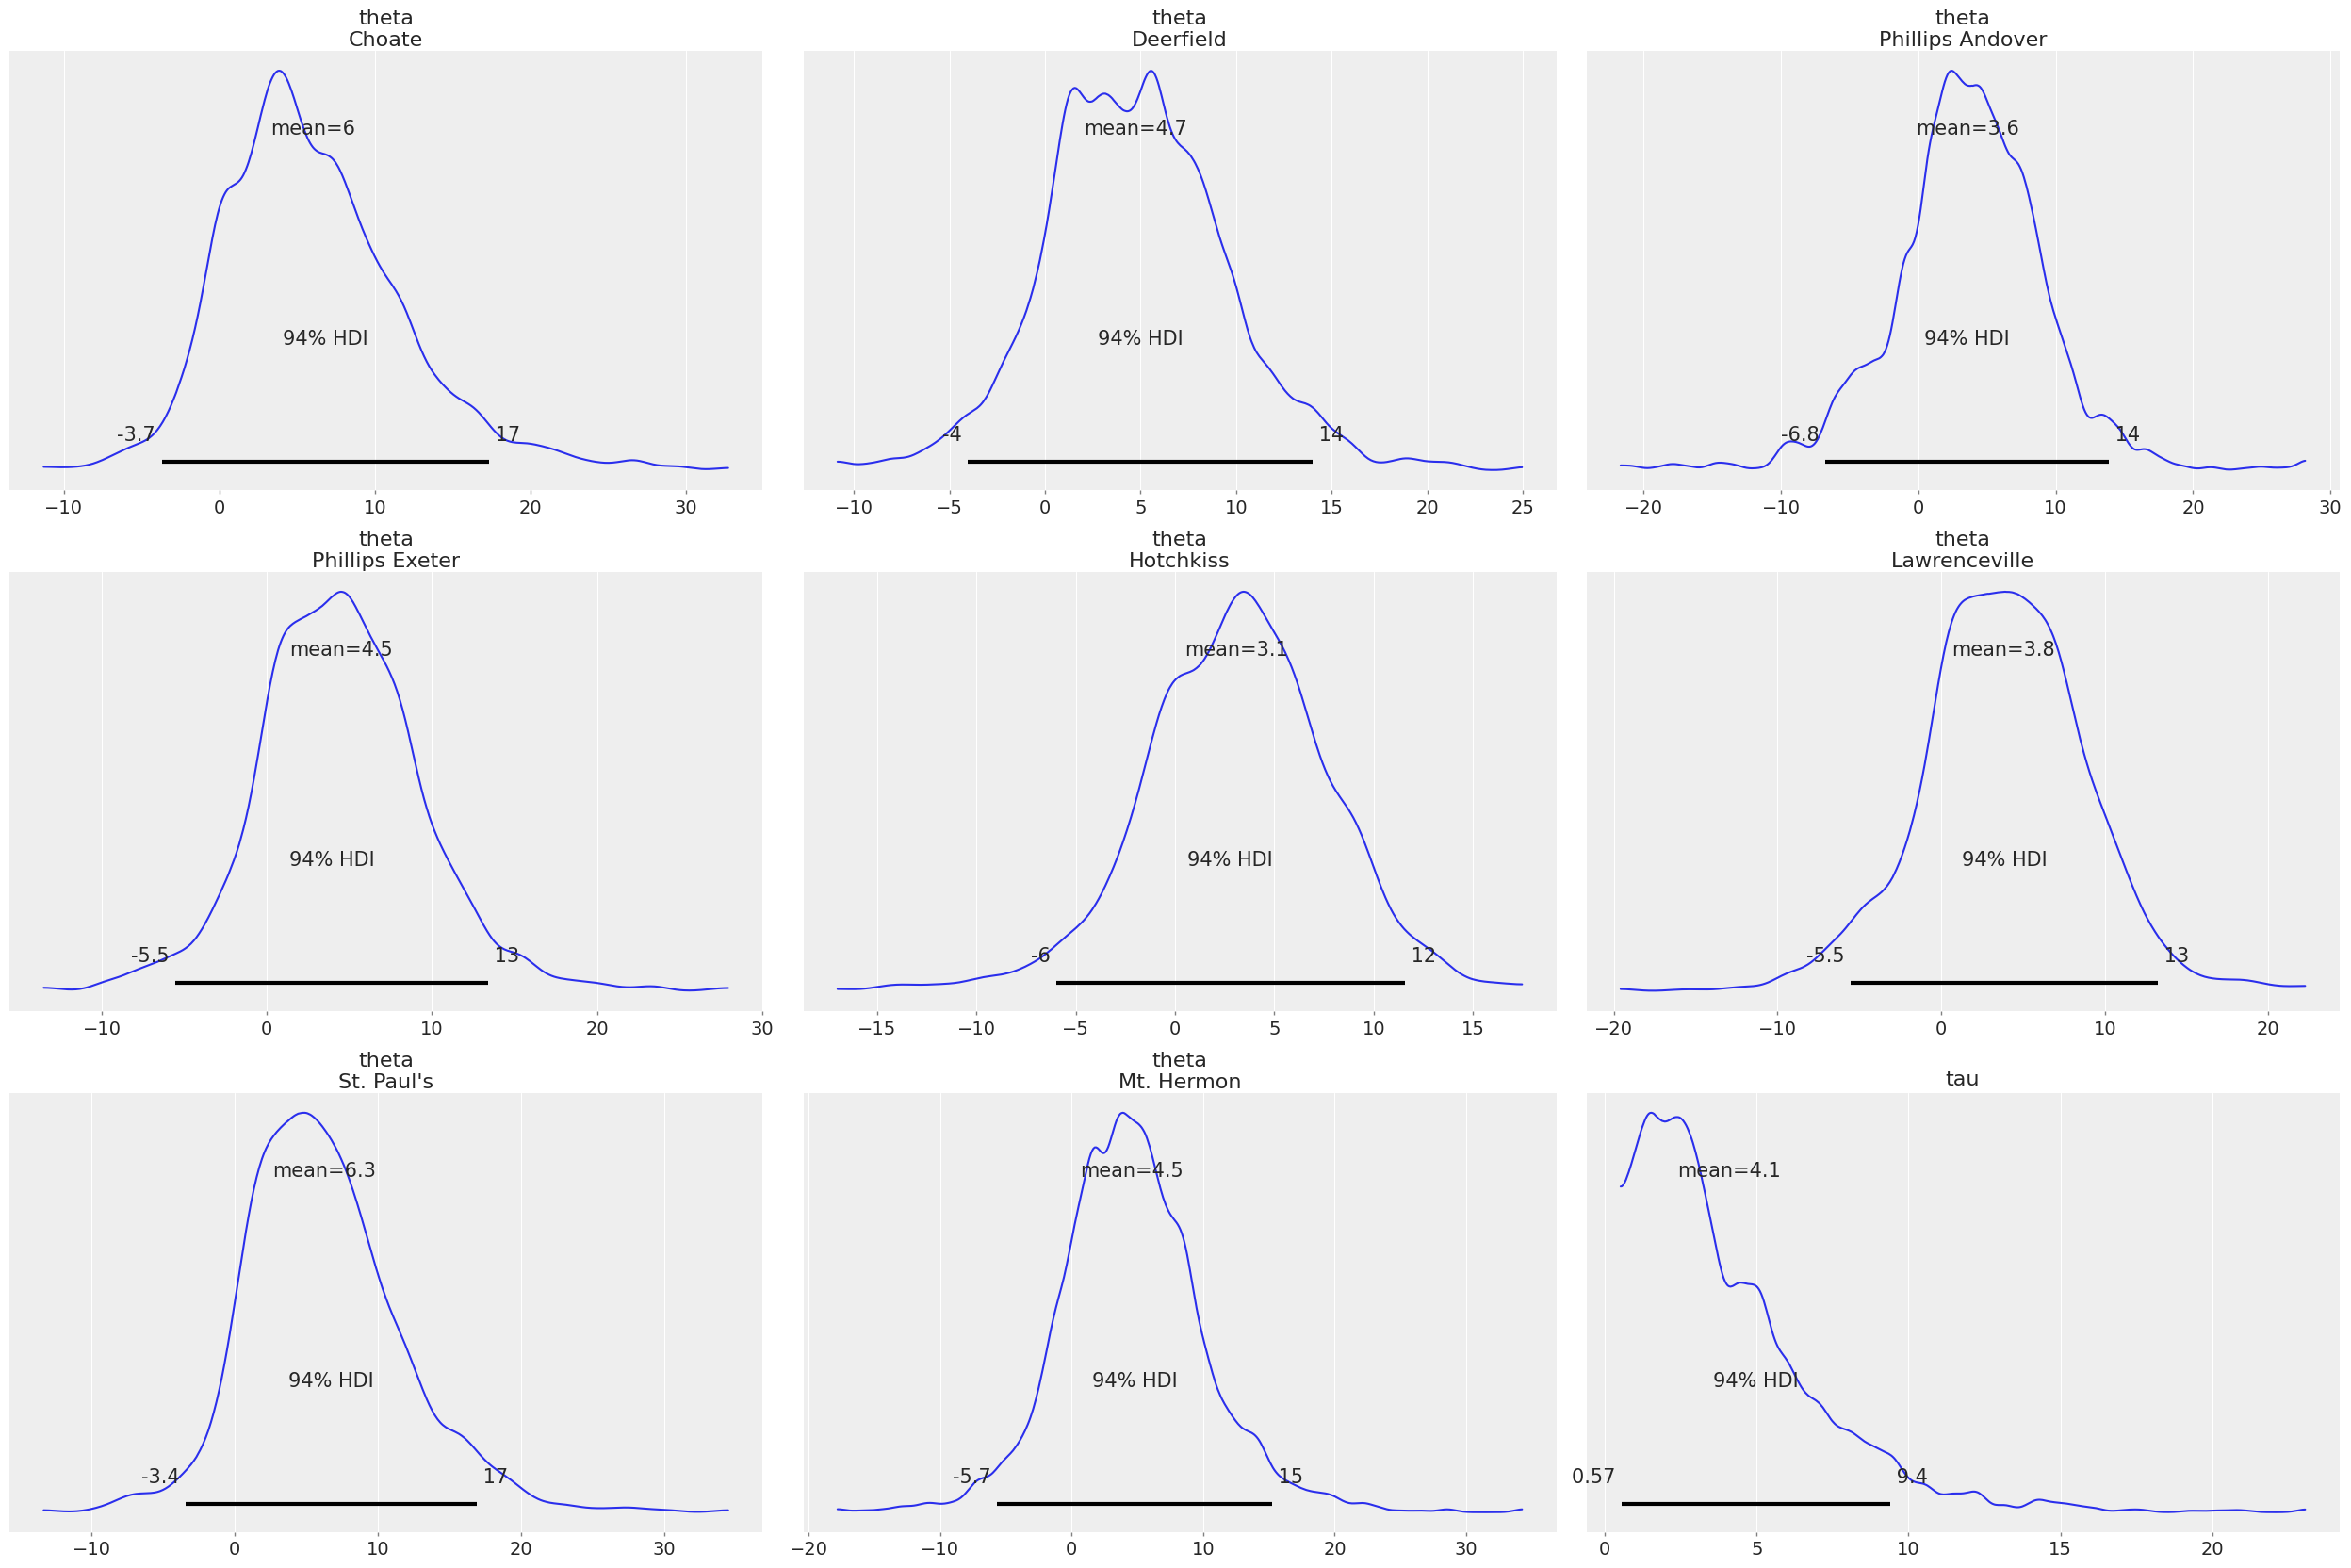

In [9]:
az.plot_posterior(centered_eight, var_names='ta', filter_vars="like");

Both `tau` and `theta` have `ta` inside them, so only `mu` is excluded in this case.
You can also use lists and you can also use the `~` prefix to indicate
that all variables containing that substring should be excluded.

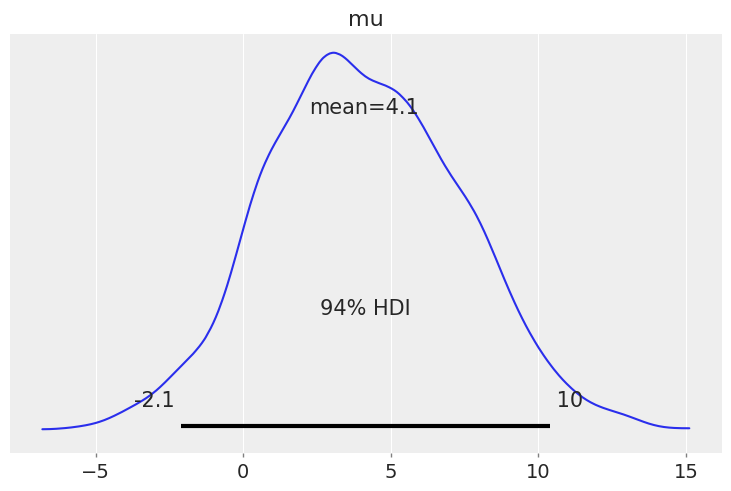

In [10]:
az.plot_posterior(centered_eight, var_names='~ta', filter_vars="like");

If `“regex”`, interpret `var_names` as regular expressions on the real variables names.
The regular expression `u$` matches the letter "u" at the end of the line
(end of the variable name in this case). So it will match `mu` and `tau`
variables:

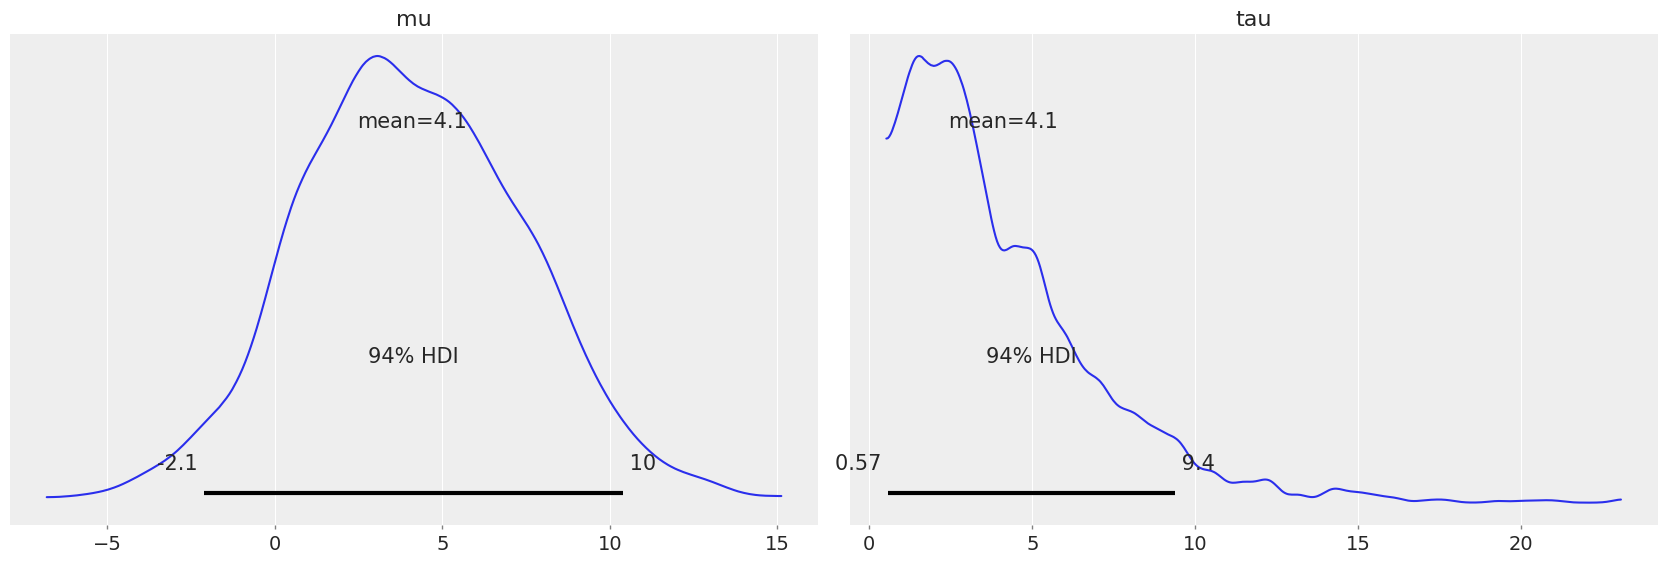

In [11]:
az.plot_posterior(centered_eight, var_names="u$", filter_vars="regex");

Again, like with `filter_vars="like"`, a list of regular expressions can
also be provided as well as negative conditions with `~`.

:::{note}
When providing a list of regular expressions and substring matches,
they are expanded independently.
:::

(common_coords)=
## `coords`
Dictionary mapping dimensions to selected coordinates to be plotted.
Dimensions without a mapping specified will include the data corresponding
to all coordinate values for that dimension.
It defaults to including all coordinates for all dimensions.

Using coords argument to plot only a subset of data:

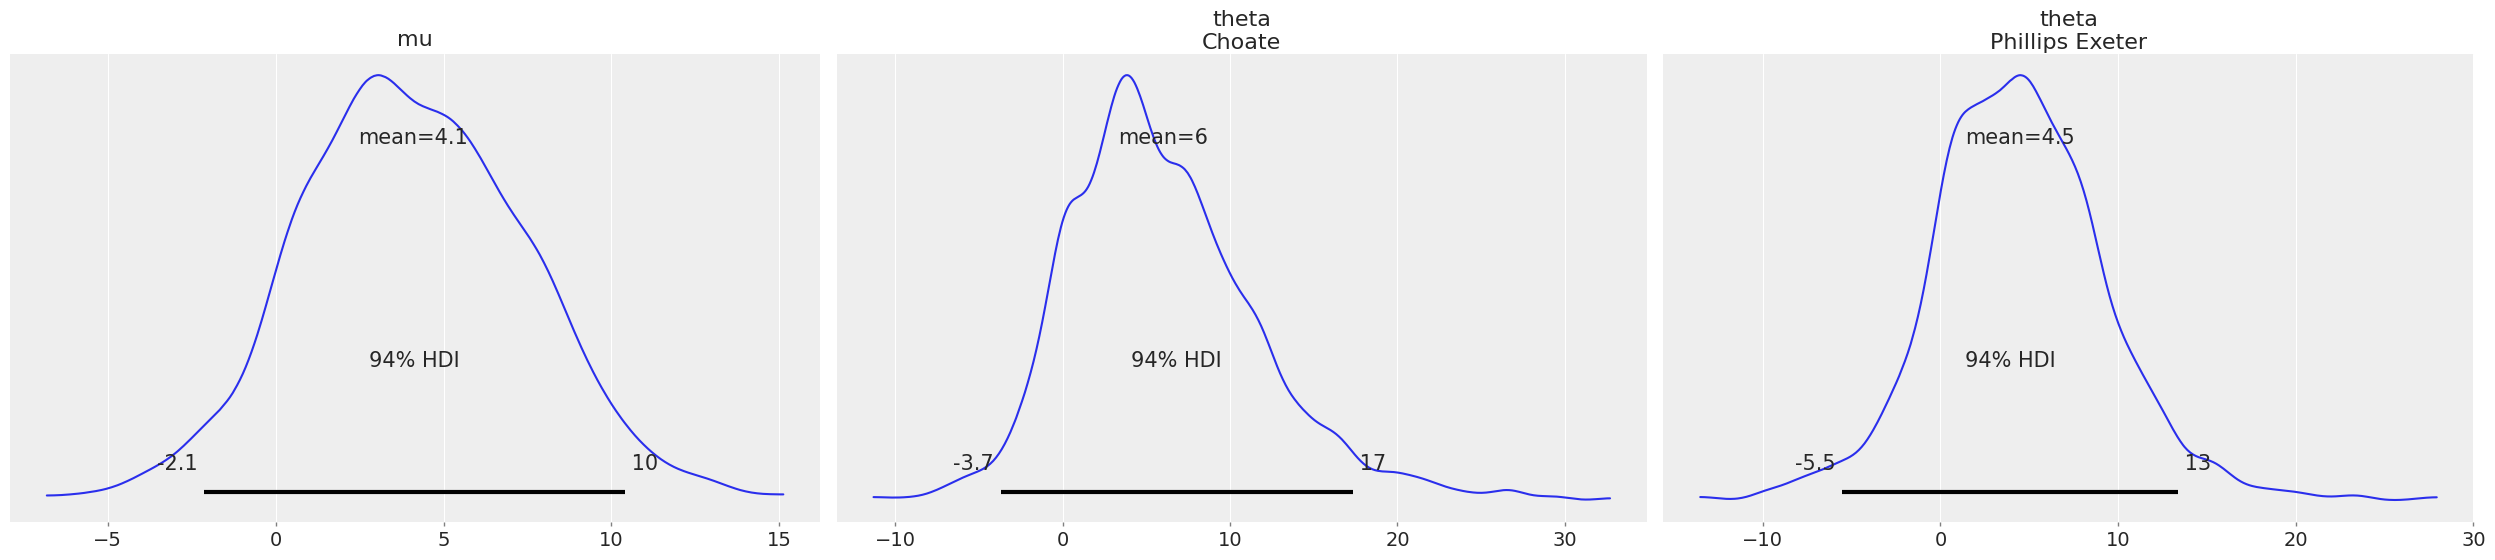

In [12]:
coords = {"school": ["Choate", "Phillips Exeter"]};
az.plot_posterior(centered_eight, var_names=["mu", "theta"], coords=coords);

(common_combined)=
## `combined`

Flag for combining multiple chains into a single chain.
When `True`, chains are combined into a single plot/line,
when `False` each chain is plotted independently
(either beside each other or each in their own subplot).
While the behaviour of the parameter is the same in all plots,
its default depends on the plotting function.

Plot each chain separately:

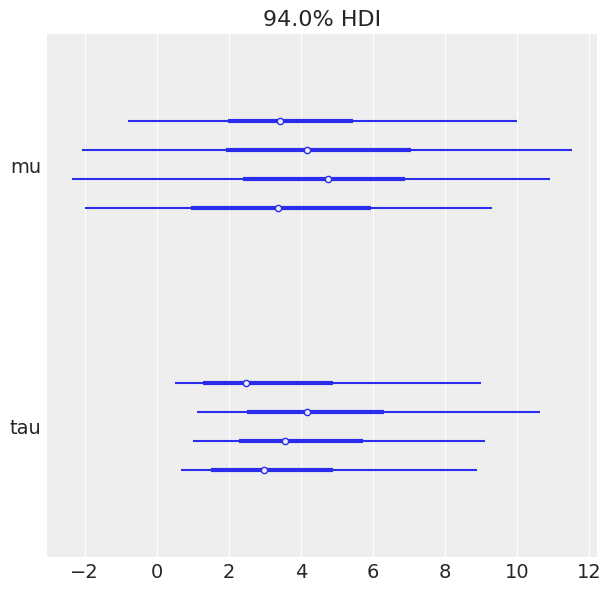

In [13]:
az.plot_forest(centered_eight, var_names=["mu", "tau"]);

Plot all chains collapsed into a single line:

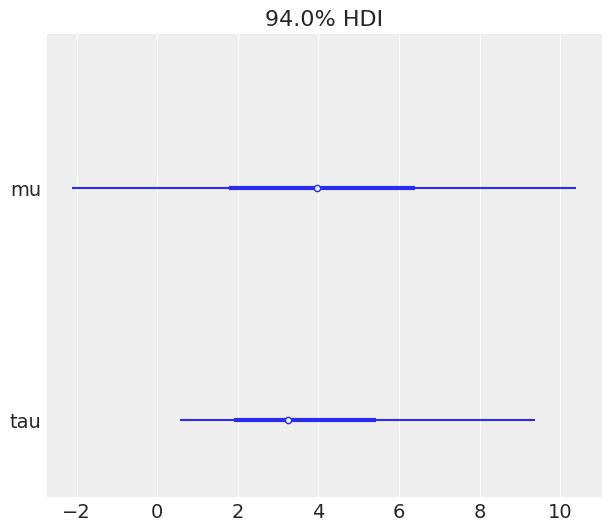

In [14]:
az.plot_forest(centered_eight, var_names=["mu", "tau"], combined=True);

(common_combine_dims)=
## `combine_dims`
Set like argument containing dimensions to reduce for plots that represent probability
distributions. When used, the dimensions on `combine_dims` are added to `chain` and
`draw` dimensions and reduced to generate a single KDE/histogram/dot plot from >2D
arrays.

`combine_dims` dims can be used to generate the KDE of the distribution of `theta`
when combining all schools together.

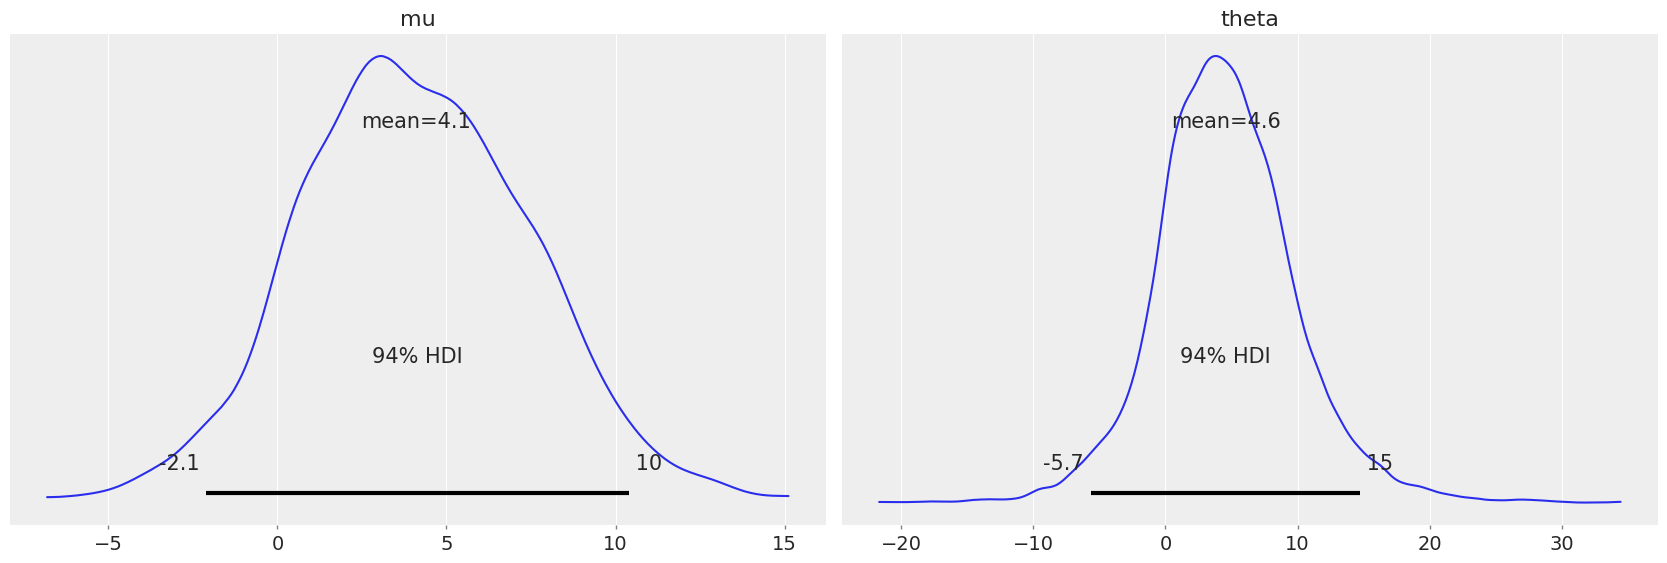

In [15]:
az.plot_posterior(centered_eight, var_names=["mu", "theta"], combine_dims={"school"});

:::{warning}
`plot_pair` also supports `combine_dims` argument, but it's the users responsibility
to ensure the variables to be plotted have compatible dimensions when reducing
them pairwise.
:::

Both `theta` and `theta_t` have the `school` dimension, so we can use `combine_dims`
in `plot_pair` to generate their global 2d KDE.

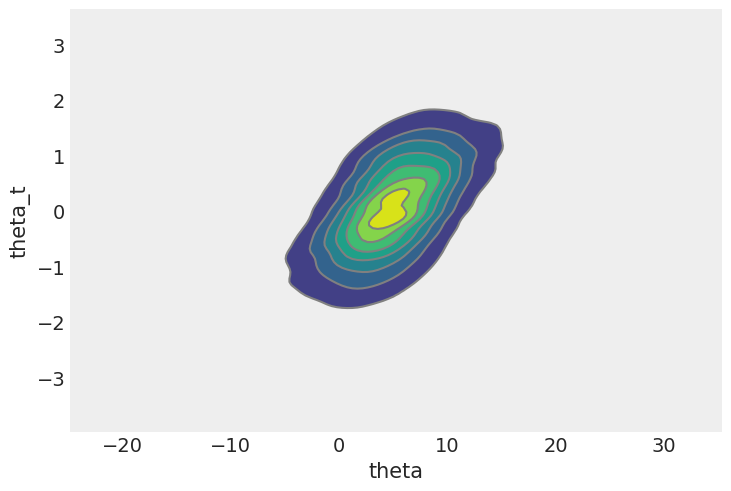

In [16]:
az.plot_pair(
    non_centered_eight, var_names=["theta", "theta_t"], combine_dims={"school"}, kind="kde"
);

`mu` however does not, so trying to plot their combined distribution errors out:

ValueError: x and y must have same first dimension, but have shapes (16000,) and (2000,)

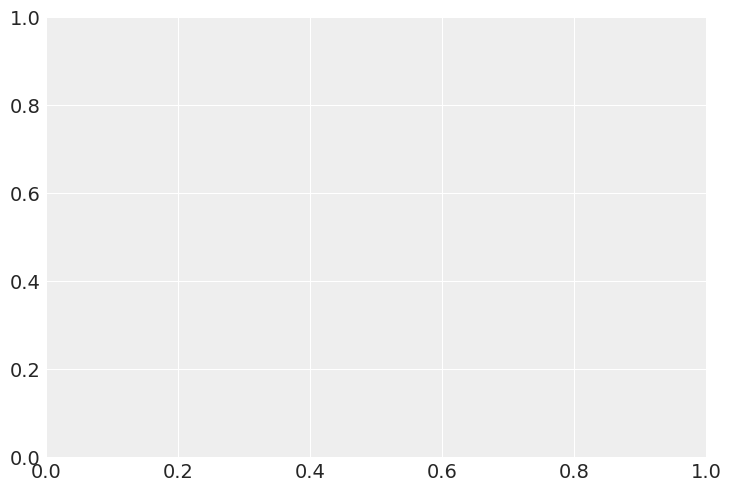

In [17]:
az.plot_pair(non_centered_eight, var_names=["theta", "mu"], combine_dims={"school"});

`combine_dims` can be used alongside `combined`, but it can't be used to replace it.
When `combined=True`, ArviZ does extra processing in addition to adding
`"chain"` to `combine_dims` under the hood. Therefore:

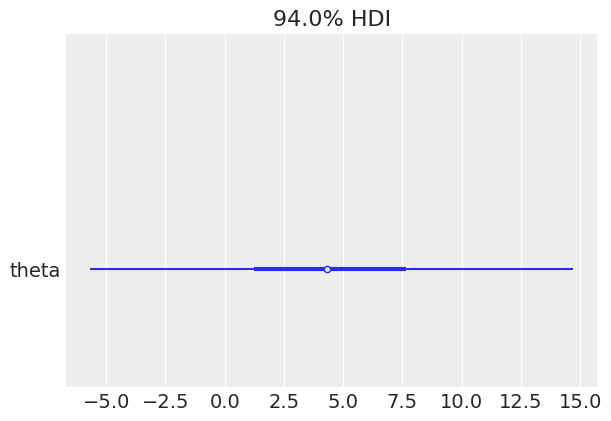

In [18]:
az.plot_forest(
    centered_eight, var_names="theta", combined=True, combine_dims={"school"}
);

is not equivalent to:

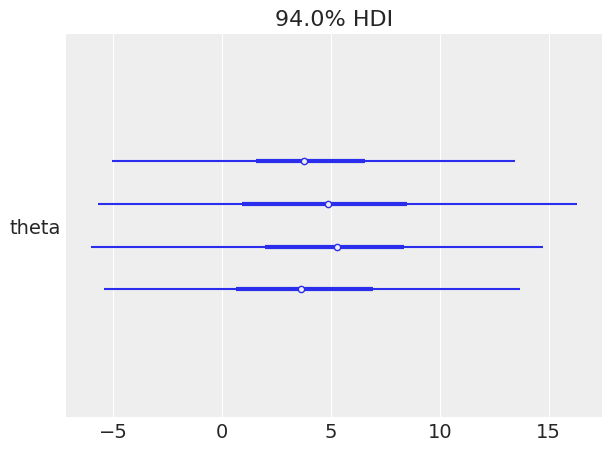

In [19]:
az.plot_forest(
    centered_eight, var_names="theta", combine_dims={"chain", "school"}
);

(common_hdi_prob)=
## `hdi_prob`

Probability for the highest density interval (HDI).
Defaults to ``stats.hdi_prob`` rcParam.

Plot the 80% HDI interval of simulated regression data using `y` argument:

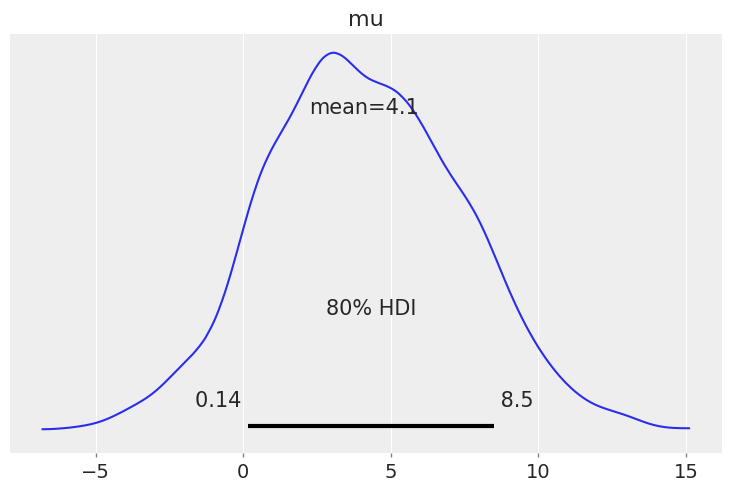

In [20]:
az.plot_posterior(centered_eight, var_names="mu", hdi_prob=0.8);

(common_grid)=
## `grid`
Number of rows and columns. Defaults to None, the rows and columns are automatically inferred.

Plot variables in a 4x5 grid:

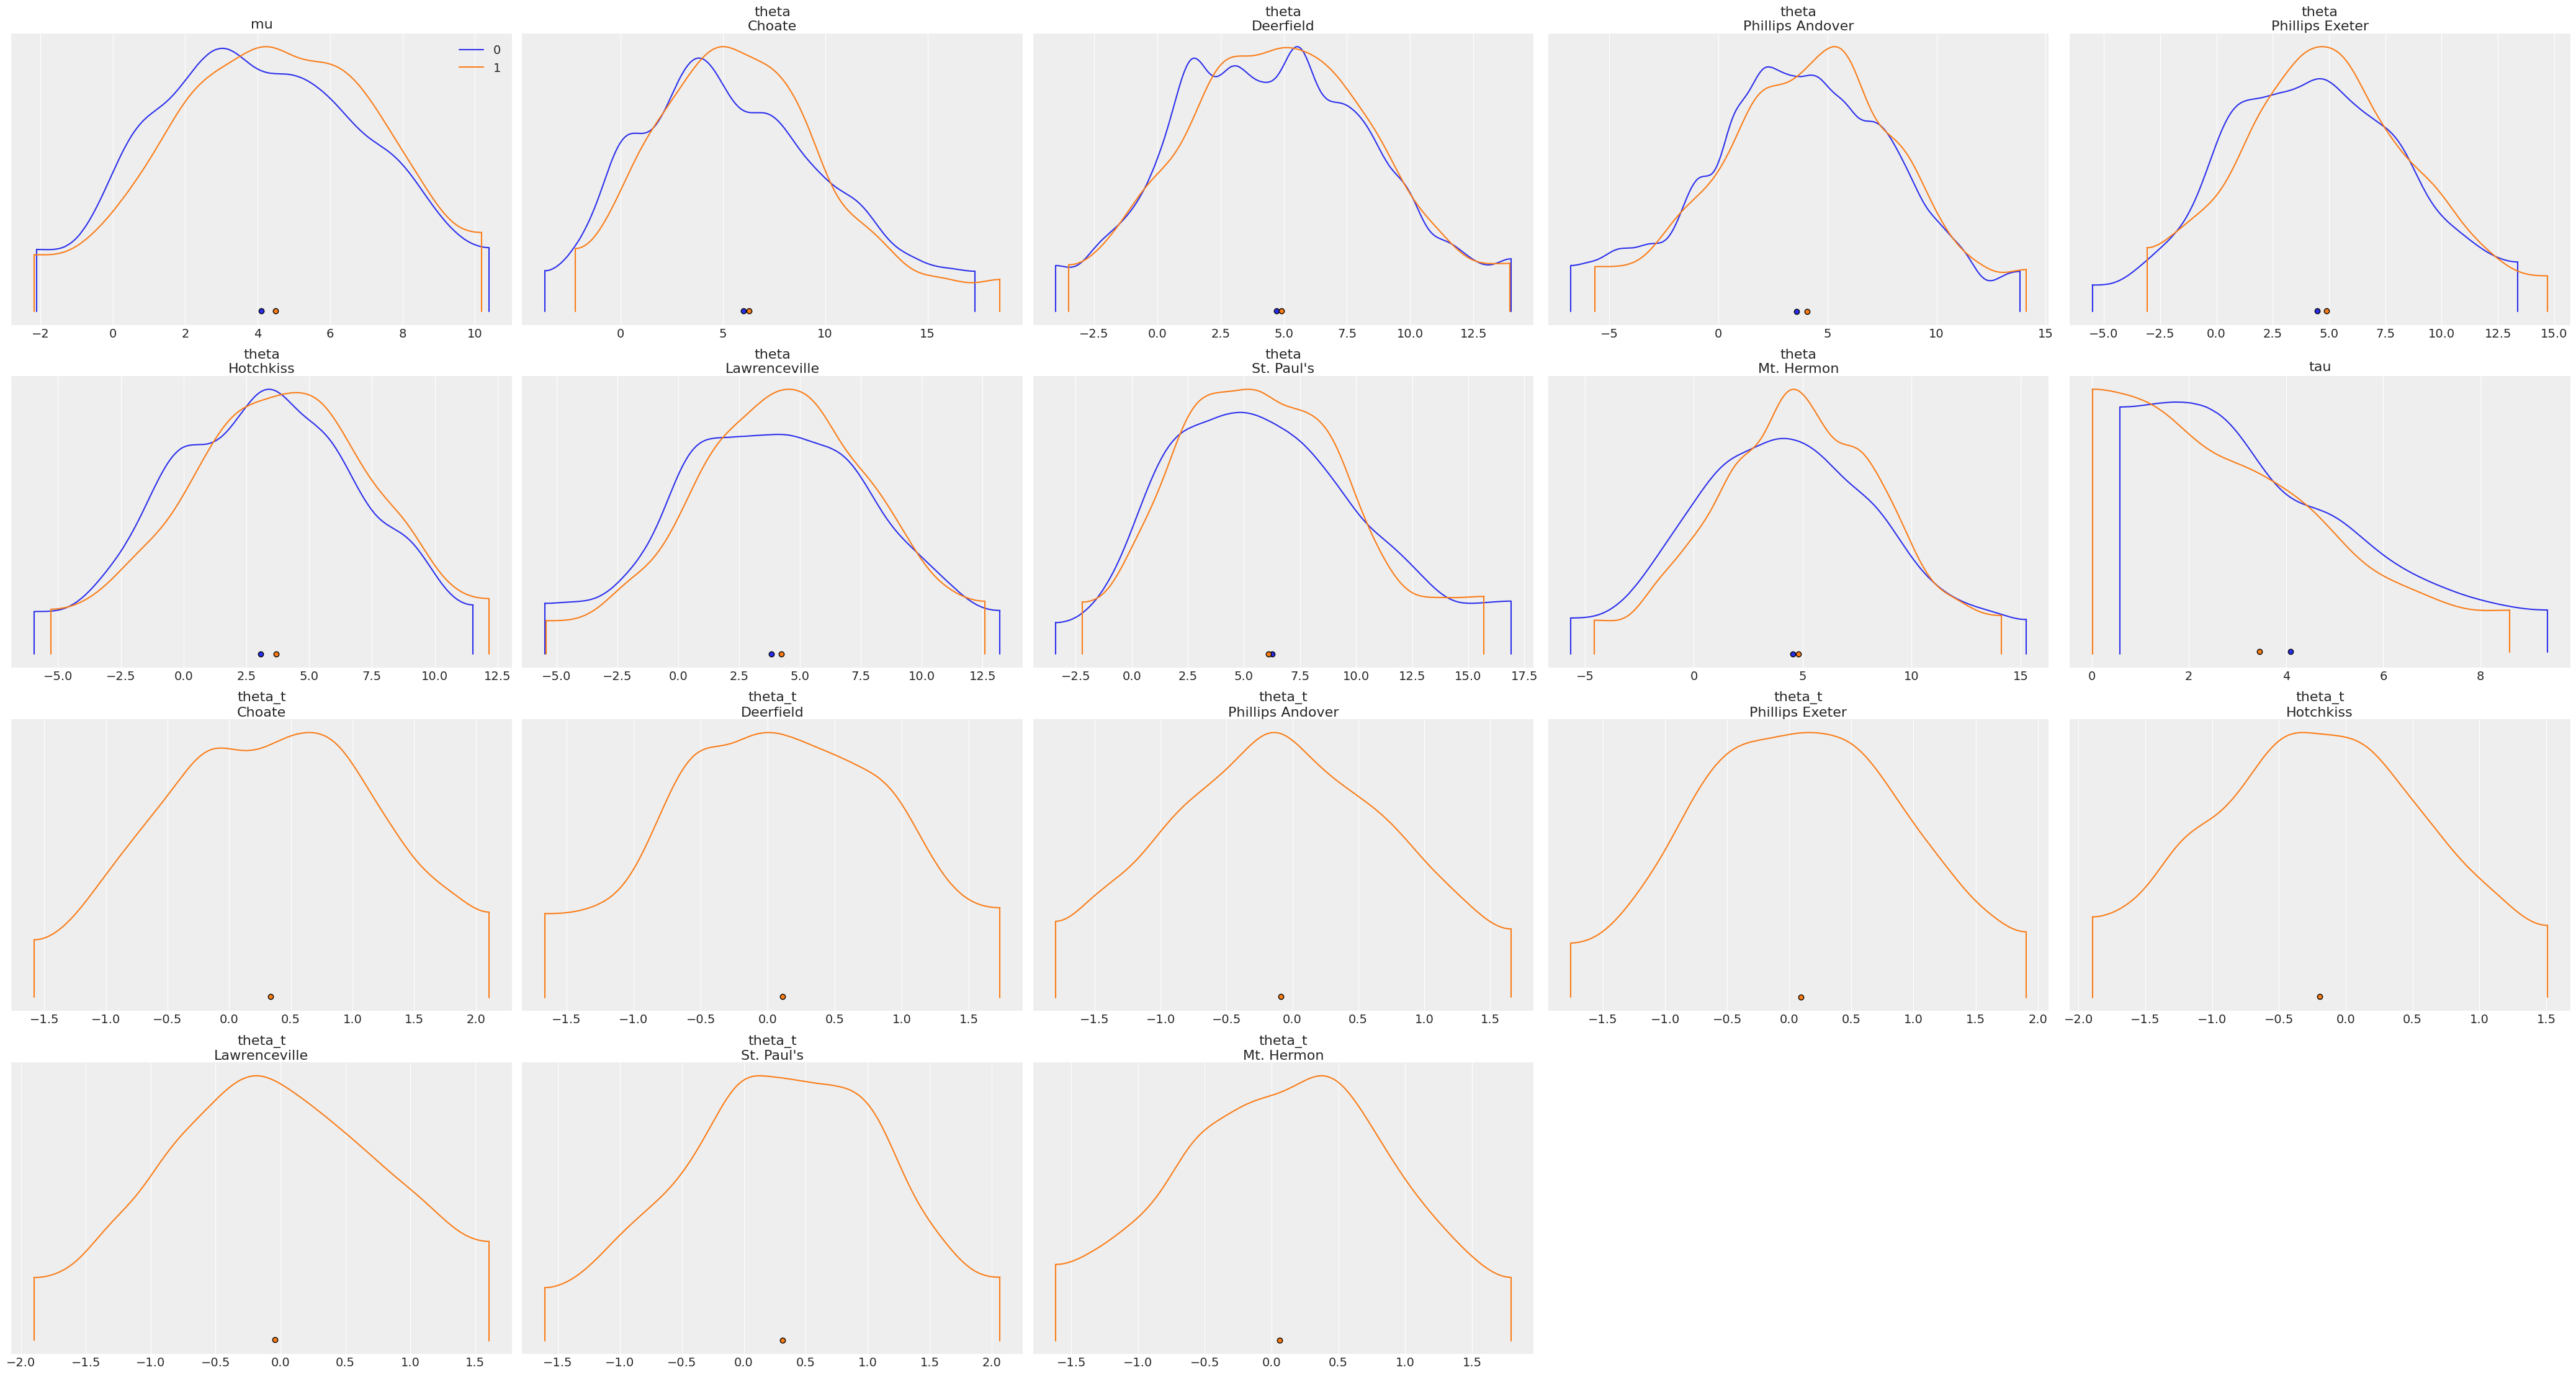

In [21]:
az.plot_density([centered_eight, non_centered_eight], grid=(4, 5));

(common_figsize)=
## `figsize`

`figsize` is short for figure size, expressed as a tuple.
By default it is defined automatically.

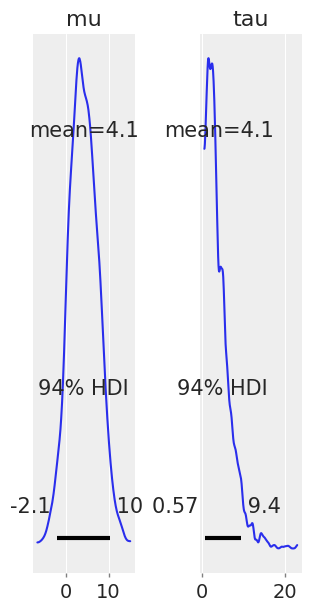

In [22]:
az.plot_posterior(centered_eight, var_names=["mu", "tau"], figsize=(3, 6));

(common_textsize)=
## `textsize`

Text size for labels, titles and lines.
By default it is autoscaled based on ``figsize``.

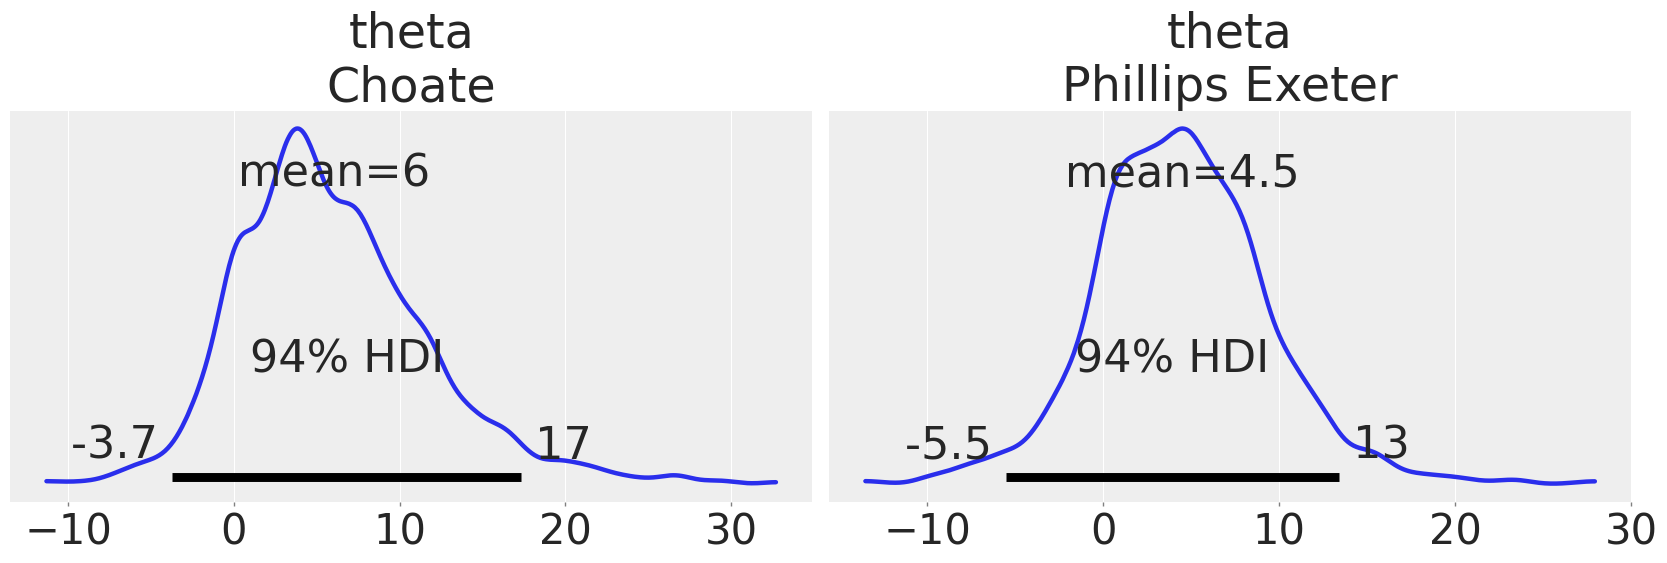

In [23]:
az.plot_posterior(centered_eight, var_names="theta", coords=coords, textsize=30);

(common_color)=
## `color` or `colors`

Color used for the main element or elements of the plot.
It should be a valid matplotlib color, even if using the bokeh backend.

While both libraries use CSS colors as their base named colors,
matplotlib also supports theme based colors like `C0` as well
as tableau and xkcd colors. ArviZ converts the provided colors
to hex RGB format using matplotlib before passing it to either
plotting backend.

Plot the HDI interval of simulated regression data using `y` argument, in red:

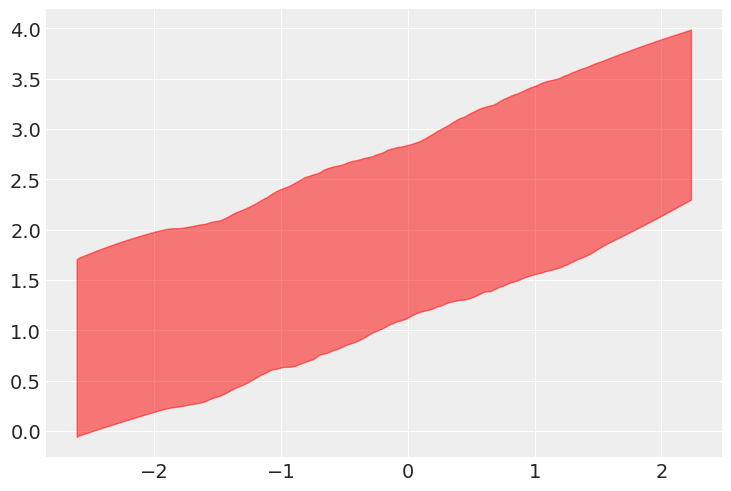

In [24]:
az.plot_hdi(x_data, y_data, color="red");

`colors` behaves like `color` but it takes an iterable of colors instead
of a single color. The number of colors to be provided is defined by
the models being compared (like in `plot_density`) of by the number
of different quantities being plotted (like in `plot_ppc`).

:::{warning}
In {func}`~arviz.plot_elpd` and {func}`~arviz.plot_khat`, where scatter plots are generated with
one dot per observation, `color` can also take an {term}`numpy:array_like` of colors, one per dot.

There are examples in their respective docstrings.
:::

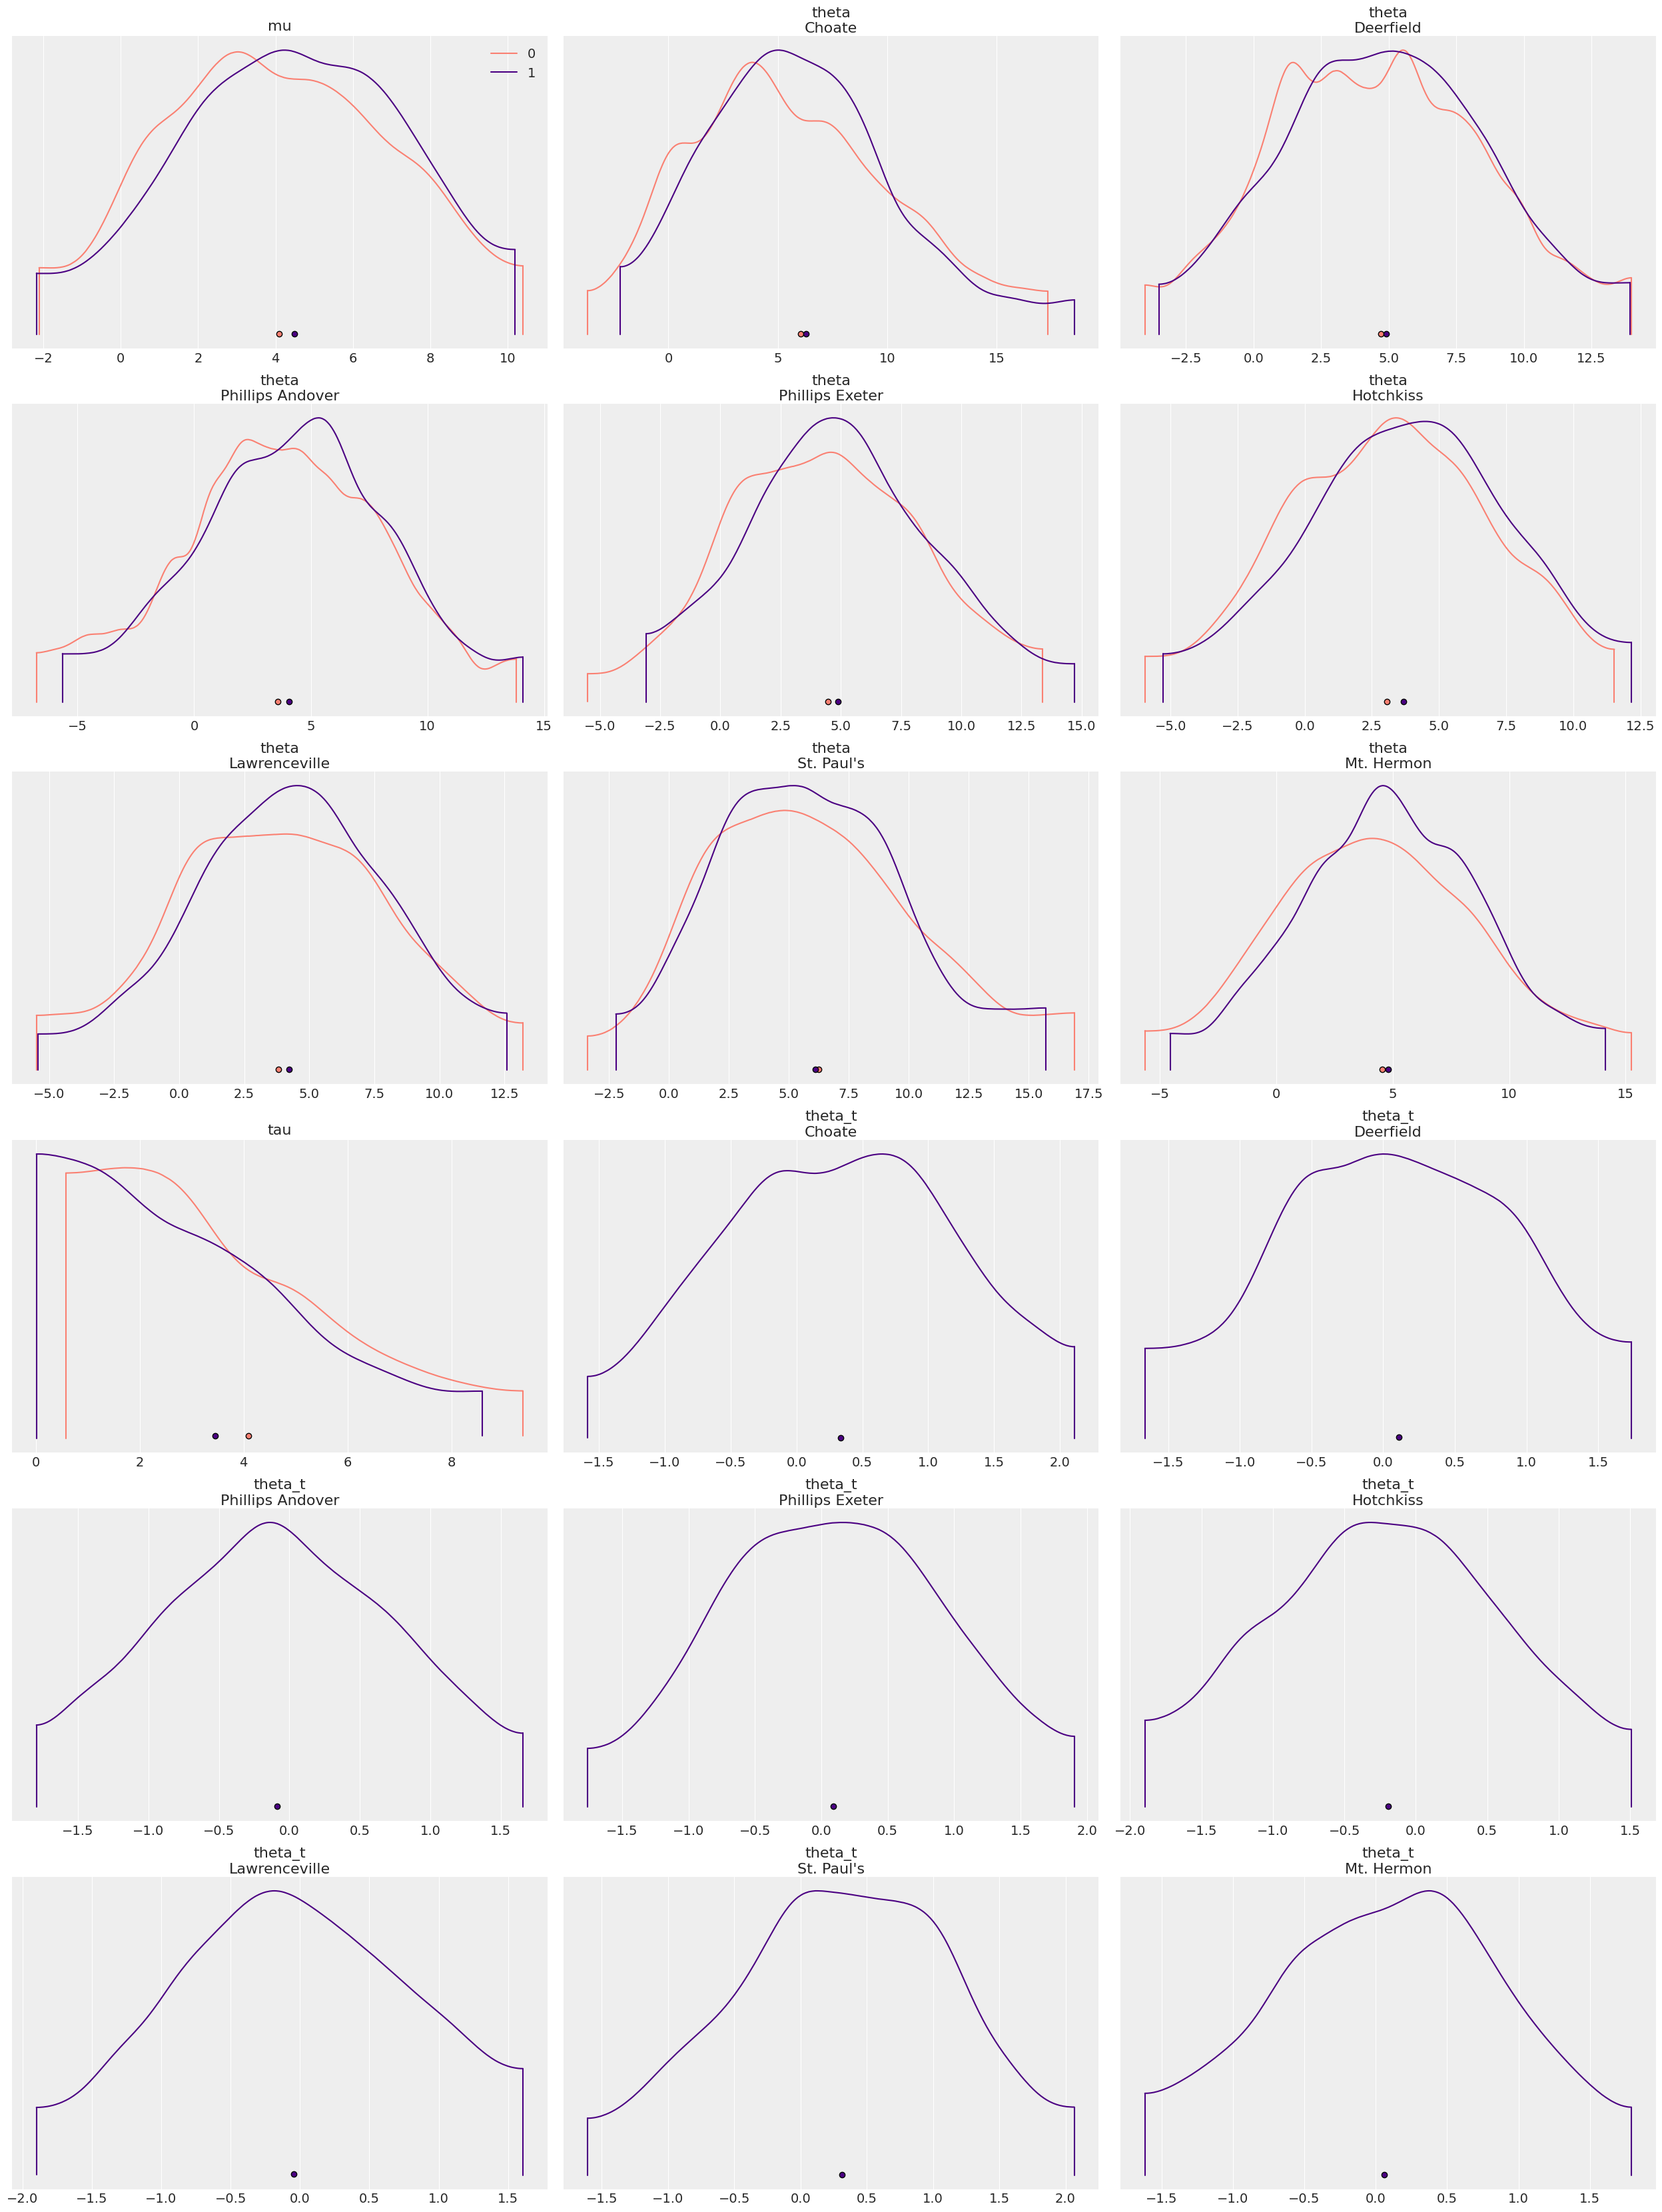

In [25]:
az.plot_density([centered_eight, non_centered_eight], colors=["salmon", "indigo"]);

:::{seealso}
Matplotlib {doc}`mpl:tutorials/colors/colors` tutorial.

Module {mod}`bokeh.colors`
:::

(common_legend)=
## `legend`

Show a legend with the color encoded model information. Defaults to True, if there are multiple models.


(common_model_names)=
List with names for the models in the list of data. Useful when plotting more that one dataset.


(common_ax)=
## `ax`

`matplotlib.axes.Axes` or `bokeh.plotting.Figure`.


(common_backend)=
## `backend`

Select plotting backend {"matplotlib","bokeh"}. Defaults to "matplotlib".


(common_backend_kwargs)=
## `backend_kwargs`

These are kwargs specific to the backend being used, passed to `matplotlib.pyplot.subplots` or `bokeh.plotting.figure`. For additional documentation check the plotting method of the backend.


(common_show)=
## `show`

Call backend show function.